In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing , cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime
%matplotlib inline

C:\Users\mohamed ismail\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
style.use('ggplot')

In [3]:
suez_cement=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/Suez Cement.csv",index_col=1)

In [4]:
suez_cement.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
1/2/2013 0:00,EGS3C181C012,10479,236337.30,18,22.50,22.69,22.05,22.55
1/3/2013 0:00,EGS3C181C012,1890,42591.50,8,22.55,22.55,22.20,22.54
1/6/2013 0:00,EGS3C181C012,2257,50205.67,8,22.50,22.50,22.01,22.24
1/8/2013 0:00,EGS3C181C012,545,11939.95,3,22.00,22.00,21.87,21.91
1/9/2013 0:00,EGS3C181C012,1782,39146.32,6,22.01,22.01,21.92,21.97


In [5]:
suez_cement['HL_PCT']=(suez_cement['HIGH_PRICE']-suez_cement['LOW_PRICE'])/suez_cement['LOW_PRICE']*100.0
suez_cement['PCT_change']=(suez_cement['CLOSE_PRICE']-suez_cement['OPEN_PRICE'])/suez_cement['OPEN_PRICE']*100.0
suez_cement.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,HL_PCT,PCT_change
TRADE_DATE,,,,,,,,,,
1/2/2013 0:00,EGS3C181C012,10479,236337.30,18,22.50,22.69,22.05,22.55,2.902494,0.222222
1/3/2013 0:00,EGS3C181C012,1890,42591.50,8,22.55,22.55,22.20,22.54,1.576577,-0.044346
1/6/2013 0:00,EGS3C181C012,2257,50205.67,8,22.50,22.50,22.01,22.24,2.226261,-1.155556
1/8/2013 0:00,EGS3C181C012,545,11939.95,3,22.00,22.00,21.87,21.91,0.594422,-0.409091
1/9/2013 0:00,EGS3C181C012,1782,39146.32,6,22.01,22.01,21.92,21.97,0.410584,-0.181736


In [6]:
suez_cement=suez_cement[['TRADE_VOLUME','CLOSE_PRICE','HL_PCT','PCT_change']]
suez_cement.head()

,TRADE_VOLUME,CLOSE_PRICE,HL_PCT,PCT_change
TRADE_DATE,,,,
1/2/2013 0:00,10479,22.55,2.902494,0.222222
1/3/2013 0:00,1890,22.54,1.576577,-0.044346
1/6/2013 0:00,2257,22.24,2.226261,-1.155556
1/8/2013 0:00,545,21.91,0.594422,-0.409091
1/9/2013 0:00,1782,21.97,0.410584,-0.181736


In [8]:
suez_cement.fillna(value=-999999,inplace=True)
forecast_out=int(math.ceil(0.012*len(suez_cement)))
forecast_out

14

In [9]:
suez_cement['Label']=suez_cement['CLOSE_PRICE'].shift(-forecast_out)
suez_cement.tail()

,TRADE_VOLUME,CLOSE_PRICE,HL_PCT,PCT_change,Label
TRADE_DATE,,,,,
12/25/2017 0:00,628,24.77,0.000000,0.000000,NaN
12/26/2017 0:00,4685,24.66,4.166667,-0.804505,NaN
12/27/2017 0:00,16299,24.02,3.793247,0.083333,NaN
12/28/2017 0:00,2456,23.71,5.296610,-0.378151,NaN
12/31/2017 0:00,2632,24.33,2.384937,1.799163,NaN


In [11]:
X=np.array(suez_cement.drop(['Label'],1))
X=preprocessing.scale(X)

In [12]:
X_lately=X[-forecast_out:]
X=X[:-forecast_out]

In [13]:
suez_cement.dropna(inplace=True)
len(suez_cement)

1071

In [14]:
suez_cement.head()

,TRADE_VOLUME,CLOSE_PRICE,HL_PCT,PCT_change,Label
TRADE_DATE,,,,,
1/2/2013 0:00,10479,22.55,2.902494,0.222222,22.16
1/3/2013 0:00,1890,22.54,1.576577,-0.044346,21.33
1/6/2013 0:00,2257,22.24,2.226261,-1.155556,21.39
1/8/2013 0:00,545,21.91,0.594422,-0.409091,21.50
1/9/2013 0:00,1782,21.97,0.410584,-0.181736,21.96


In [15]:
len(X)

1071

In [16]:
y=np.array(suez_cement['Label'])
len(y)

1071

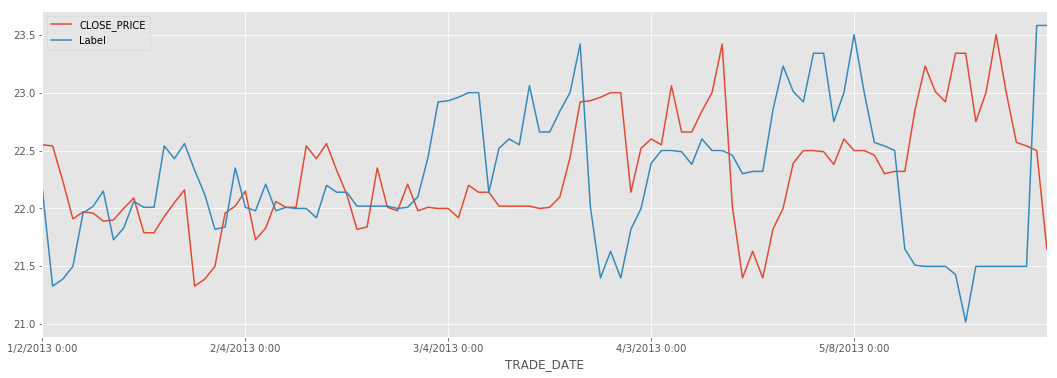

In [17]:
tmp=suez_cement[['CLOSE_PRICE','Label']]
tmp[:100].plot(figsize=(18,6))
plt.show()

In [18]:
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2)

In [19]:
clf=LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
forecast_set=clf.predict(X_lately)
y_pred_lr=clf.predict(X_test)
len(X_lately),len(X_test),len(y_test),len(X_train),len(forecast_set)

(14, 215, 215, 856, 14)

In [21]:
suez_cement['Forecast']=np.nan
suez_cement.tail()

,TRADE_VOLUME,CLOSE_PRICE,HL_PCT,PCT_change,Label,Forecast
TRADE_DATE,,,,,,
12/5/2017 0:00,10651,27.30,3.703704,-2.500000,24.77,NaN
12/6/2017 0:00,800,27.06,0.296187,-0.110742,24.66,NaN
12/7/2017 0:00,200,27.06,0.258876,-0.184434,24.02,NaN
12/10/2017 0:00,100,27.06,0.000000,-3.357143,23.71,NaN
12/11/2017 0:00,45528,27.06,0.631970,0.594796,24.33,NaN


In [23]:
last_date=suez_cement.iloc[-1].name
last_date

'12/11/2017 0:00'

In [24]:
one_day=86400 #minutes
ts = datetime.datetime.now().timestamp()
last_day=ts
next_day=last_day+one_day
ts

1517974761.958635

In [26]:
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_day)
    next_day+=86400
    suez_cement.loc[next_date]=[np.nan for j in range(len(suez_cement.columns)-1)]+[i]

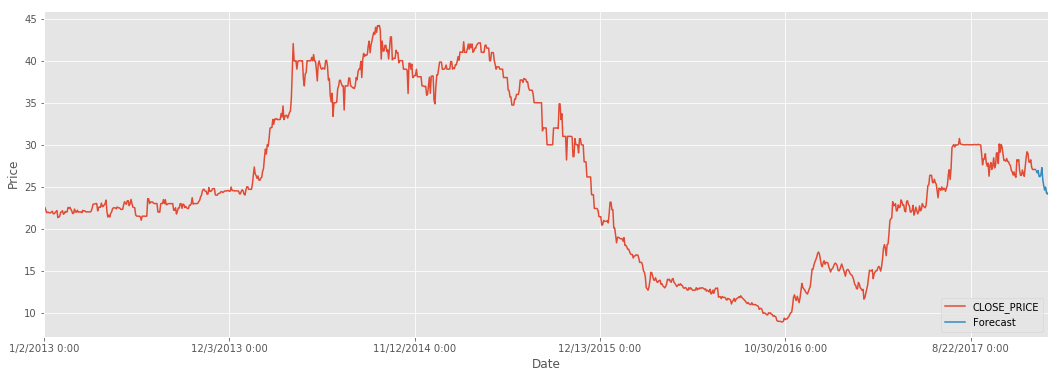

In [27]:
suez_cement[['CLOSE_PRICE','Forecast']].plot(figsize=(18,6))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

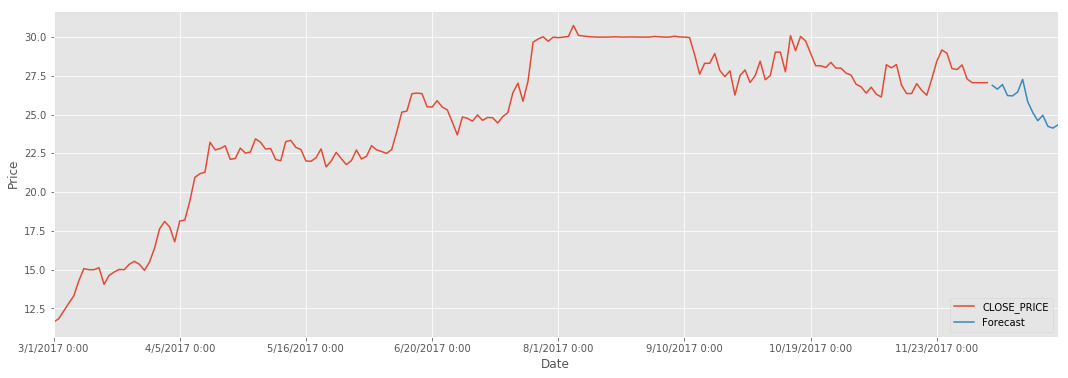

In [28]:
suez_cement[['CLOSE_PRICE','Forecast']][-200:].plot(figsize=(18,6))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [29]:
accuracy=clf.score(X_test,y_test)
accuracy*100

93.477295229262396

In [31]:
suez_cement.tail()

,TRADE_VOLUME,CLOSE_PRICE,HL_PCT,PCT_change,Label,Forecast
TRADE_DATE,,,,,,
2018-02-17 19:39:21.958635,NaN,NaN,NaN,NaN,NaN,24.609907
2018-02-18 19:39:21.958635,NaN,NaN,NaN,NaN,NaN,24.959676
2018-02-19 19:39:21.958635,NaN,NaN,NaN,NaN,NaN,24.245279
2018-02-20 19:39:21.958635,NaN,NaN,NaN,NaN,NaN,24.130686
2018-02-21 19:39:21.958635,NaN,NaN,NaN,NaN,NaN,24.342911
